In [1]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")

include("c:/Users/lisah/Documents/Repos/ma-code/src/src.jl")

using .Src

  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


In [2]:
using Plots

In [3]:
# biomass equilibrium branches
function n(a, m, plus::Bool)
    sqrt_term = sqrt(a^2 - 4*m^2)
    if plus
        return (a + sqrt_term) / (2*m)
    else
        return (a - sqrt_term) / (2*m)
    end
end

# water equilibrium branches
function w(a, m, plus::Bool)
    sqrt_term = sqrt(a^2 - 4*m^2)
    if plus
        return (2*m^2) / (a + sqrt_term)
    else
        return (2*m^2) / (a - sqrt_term)
    end
end

w (generic function with 1 method)

In [55]:
# Bifurcation plot
function bif_plot(m::Float64, comp::String; points=[])
    a_vals = range(2*m, stop=2, length=400)
    
    if comp == "n"
        plus = [n(a, m, true) for a in a_vals]
        minus = [n(a, m, false) for a in a_vals]
    else
        plus = [w(a, m, true) for a in a_vals]
        minus = [w(a, m, false) for a in a_vals]
    end

    # Plot the bifurcation curves
    plot(a_vals, plus, color=:black, label="", lw=3, xlim=(0, maximum(a_vals)), ylim=(0, 3))
    plot!(a_vals, minus, color=:black, linestyle=:dash, label="", lw=3)
    
    # Plot points if provided
    for pt in points
        scatter!([pt[1]], [pt[2]], color=:red, marker=:x, markersize=8, label="")
    end

    # Axes labels, title
    xlabel!("water input a")
    if comp == "n"
        scatter!([2*m], [1], color=:black, marker=:circle, markersize=6, label="")
        hline!([0], color=:black,  lw=5, linestyle=:solid, label="")
        ylabel!("biomass n")
    else
        scatter!([2*m], [m], color=:black, marker=:circle, markersize=6, label="")
        plot!(0:0.1:2, 0:0.1:2, color=:black,  lw=3, linestyle=:solid, label="")
        ylabel!("water input w")
    end
    title!("Bifurcation Diagram of Klausmeier Model\nm = $m")
end

bif_plot (generic function with 1 method)

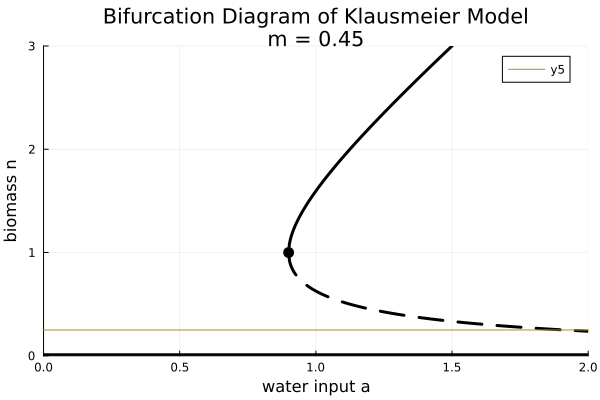

In [ ]:
bif_plot(0.45, "n")

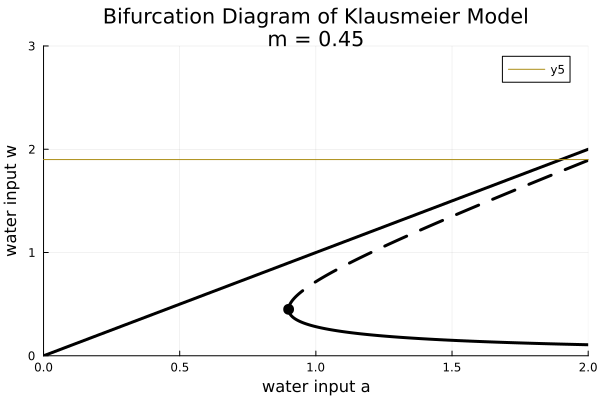

In [ ]:
bif_plot(0.45, "w")